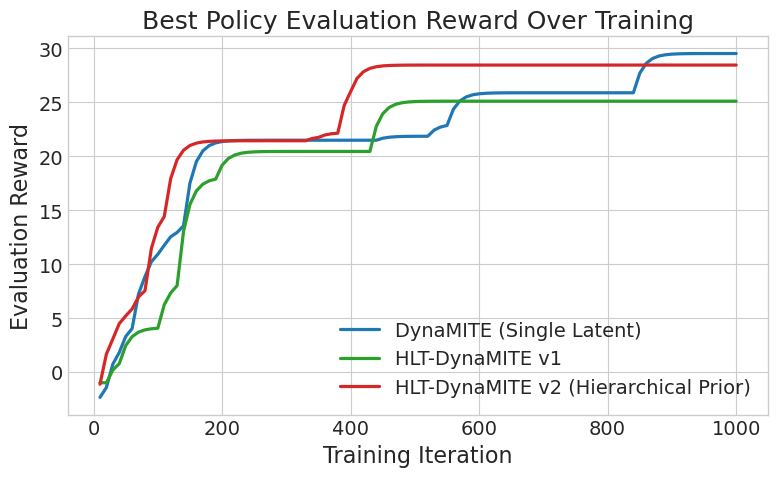

Saved: comparison_hlt_vs_dynamite.png, comparison_hlt_vs_dynamite.svg


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Plot Style (논문용)
# --------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 2.3
plt.rcParams['legend.fontsize'] = 14

# --------------------------
# Smoothing function (EMA)
# --------------------------
def smooth(values, weight=0.90):
    smoothed = []
    last = values[0]
    for v in values:
        last = last * weight + (1 - weight) * v
        smoothed.append(last)
    return smoothed

# --------------------------
# Load CSV Logs
# --------------------------
f1 = "dynamite_gridworld_dynamite_ppo.csv"
f2 = "dynamite_gridworld_hlt_old_HLT_Dynamite_ppo_v1.csv"
f3 = "dynamite_gridworld_hlt_HLT_Dynamite_ppo_v2.csv"

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)

# --------------------------
# Extract Step / Value
# --------------------------
x1, y1 = df1["Step"], df1["Value"]
x2, y2 = df2["Step"], df2["Value"]
x3, y3 = df3["Step"], df3["Value"]

# --------------------------
# Smooth curves
# --------------------------
sm=0.5
y1_s = smooth(y1.values, sm)
y2_s = smooth(y2.values, sm)
y3_s = smooth(y3.values, sm)

# --------------------------
# Plot
# --------------------------
plt.figure()

plt.plot(x1, y1_s, label="DynaMITE (Single Latent)", color="#1f77b4")
plt.plot(x2, y2_s, label="HLT-DynaMITE v1", color="#2ca02c")
plt.plot(x3, y3_s, label="HLT-DynaMITE v2 (Hierarchical Prior)", color="#d62728")

plt.xlabel("Training Iteration")
plt.ylabel("Evaluation Reward")
# plt.title("Learning Curve Comparison")
plt.title("Best Policy Evaluation Reward Over Training")

plt.legend()
plt.tight_layout()

# plt.savefig("comparison_hlt_vs_dynamite.png", dpi=300)
# plt.savefig("comparison_hlt_vs_dynamite.svg")  # 벡터 이미지 (논문용)
plt.savefig("best_comparison_hlt_vs_dynamite.png", dpi=300)
# plt.savefig("best_comparison_hlt_vs_dynamite.svg")  # 벡터 이미지 (논문용)


plt.show()

print("Saved: comparison_hlt_vs_dynamite.png, comparison_hlt_vs_dynamite.svg")


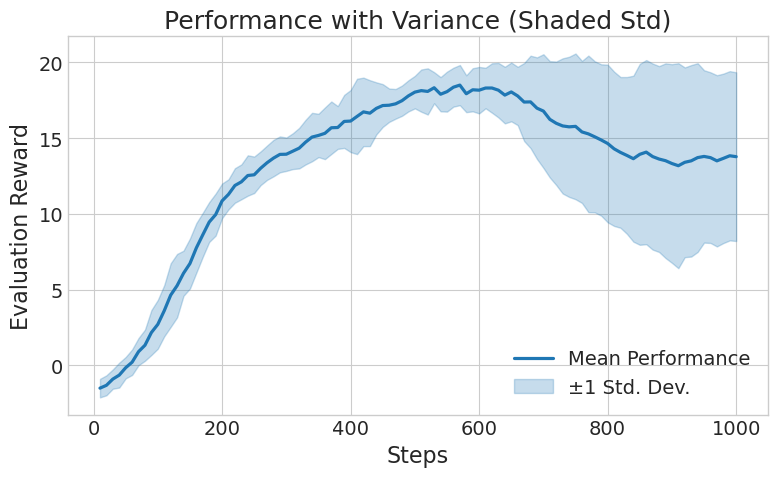

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 14

# Smoothing
def smooth(values, weight=0.90):
    last = values[0]
    smoothed = []
    for v in values:
        last = last * weight + (1 - weight) * v
        smoothed.append(last)
    return np.array(smoothed)

# Load CSVs
files = [
    "dynamite_gridworld_dynamite_ppo.csv",
    "dynamite_gridworld_hlt_old_HLT_Dynamite_ppo_v1.csv",
    "dynamite_gridworld_hlt_HLT_Dynamite_ppo_v2.csv"
]

dfs = [pd.read_csv(f) for f in files]

# Align steps (각 CSV 길이가 다를 경우 최소길이로 맞춤)
min_len = min(len(df) for df in dfs)

steps = dfs[0]["Step"][:min_len]

# Stack values for mean/std
values_matrix = np.vstack([smooth(df["Value"].values[:min_len]) for df in dfs])

mean_curve = values_matrix.mean(axis=0)
std_curve = values_matrix.std(axis=0)

# Plot
plt.figure()

plt.plot(steps, mean_curve, label="Mean Performance", color="#1f77b4")

# Shaded area (mean ± std)
plt.fill_between(
    steps,
    mean_curve - std_curve,
    mean_curve + std_curve,
    color="#1f77b4",
    alpha=0.25,
    label="±1 Std. Dev."
)

plt.xlabel("Steps")
plt.ylabel("Evaluation Reward")
plt.title("Performance with Variance (Shaded Std)")

plt.legend()
plt.tight_layout()

plt.savefig("mean_std_shaded.png", dpi=300)
plt.savefig("mean_std_shaded.svg")

plt.show()
